# Monte Carlo integration of a function over interval

A standard example of the Monte Carlo method is the evaluation of definite integrals. Suppose we want to approximate the value of the integral

$$
\int_a^b f(x) \, dx
$$


by Monte Carlo. (We assume $a<b$.) We use the fact that the mean (average) of $f$ over the interval is

$$
\bar f = \frac{1}{b-a} \int_a^b f(x) \, dx
$$

All we have to do to approximate the integral is to approximate $\bar f$ over $[a,b]$ using Monte Carlo, and then multiply by $(b-a)$. 

We will demonstrate the method with a simple example.

In [1]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt

---

We consider the specific function $f(x) = 1-x^2$ and the interval $[a,b]$, where $a=-1$ and $b=1$. 

We generate a random sample of points $x$ from the uniform distribution on $[a,b]$, evaluate $f(x)$ at each of these points and compute the mean. This gives our approximation to $\bar f$. Multiplying by $(b-a)$ then gives the approximation to $\displaystyle{\int_a^b f(x) dx}$

the Monte Carlo estimate for the integral is 1.352423978643675


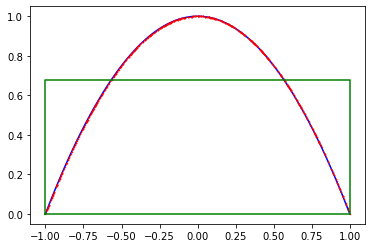

In [8]:
# define the function to integrate
def my_fun(x):
    return 1 - x**2

# set the interval [a,b] and the number of samples
a, b = -1, 1
N = 800

# generate the samples and evaluate f at each 
x = np.random.uniform(a, b, N)
f_of_x = my_fun(x)

# compute the mean and estimate the integral
f_mean = np.mean(f_of_x)
my_integral = (b-a) * f_mean
print("the Monte Carlo estimate for the integral is", my_integral)

# plot the function and sample points if N is small
if N < 1000:
    x_plot = np.linspace(a, b, 101)
    y_plot = my_fun(x_plot)
    plt.plot(x_plot ,y_plot, 'b')
    plt.plot(x, f_of_x, 'ro', markersize = 0.5)
    plt.plot([a,b,b,a,a],[0,0,f_mean, f_mean,0], 'g')
    plt.show()

The cell includes Python code to plot the function and the sample points $(x_i, f(x_i))$ if `N<1000`. Also plotted is a rectangle using the base and the mean of the values $f(x_i)$. Try running the cell with `N=50`. Re-run the cell a few times to observe the different samples. 

Think about it geometrically. You randomly pick some points on a hill and use those to estimate the average height of the hill. From the known base length then you can then approximate area of the hill as the area of a rectangle. 

With only 50 points the mean from the sample is not very precise, but it is also not terrible, at least not most of the time. (Some samples will give bad estimates. That's the nature of Monte Carlo!) 

---

It is worth stressing how remarkably simple the code is. Both the function and the interval can be easily changed and so this simple code covers pretty every case of finite $a$ and $b$ and any maths function you can write as a Python function. (You can think about what to do if $a$ or $b$ is not finite. Maybe use function composition with a function that takes finite intervals to infinite ones.)

---
# Exercise

---

1. Change the above function and interval to:
- $f(x) = \sin(x^2)$ on $[-1, 1]$. (A valley rather than a hill.)
- $f(x) = \sin^5(x)$ on $[0, \pi]$. 
- Any of [these](https://en.wikipedia.org/wiki/Nonelementary_integral) on appropriate intervals.
